<a href="https://colab.research.google.com/github/rocketwolf98/ColabCompilation/blob/main/MusicIndustrySalesEda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
!pip install fireducks
!pip install sweetviz
!pip install ydata-profiling
import fireducks.pandas as pd
import sweetviz as sv
from ydata_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import warnings
warnings.filterwarnings('ignore')

In [30]:
path = kagglehub.dataset_download("imtkaggleteam/40-years-of-music-industry-sales")
dir = "/root/.cache/kagglehub/datasets/imtkaggleteam/40-years-of-music-industry-sales/versions/1/MusicData.csv"

In [31]:
df= pd.read_csv(dir, thousands=",")

In [32]:
df.head()

?Format 
 Metric 
 Year 
 Number of Records 
 Value (Actual) 
 
 
 
 
 0 
 CD 
 Units 
 1973 
 1 
 NaN 
 
 
 1 
 CD 
 Units 
 1974 
 1 
 NaN 
 
 
 2 
 CD 
 Units 
 1975 
 1 
 NaN 
 
 
 3 
 CD 
 Units 
 1976 
 1 
 NaN 
 
 
 4 
 CD 
 Units 
 1977 
 1 
 NaN

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ?Format            3008 non-null   object 
 1   Metric             3008 non-null   object 
 2   Year               3008 non-null   int64  
 3   Number of Records  3008 non-null   int64  
 4   Value (Actual)     1351 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 117.6+ KB


In [34]:
col_names = ['Format', 'Metric', 'Year', '# Records', 'Actual Values']
df.rename(columns = dict(zip(df.columns, col_names)), inplace = True)
df

Format 
 Metric 
 Year 
 # Records 
 Actual Values 
 
 
 
 
 0 
 CD 
 Units 
 1973 
 1 
 NaN 
 
 
 1 
 CD 
 Units 
 1974 
 1 
 NaN 
 
 
 2 
 CD 
 Units 
 1975 
 1 
 NaN 
 
 
 3 
 CD 
 Units 
 1976 
 1 
 NaN 
 
 
 4 
 CD 
 Units 
 1977 
 1 
 NaN 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 3003 
 Vinyl Single 
 Value (Adjusted) 
 2015 
 1 
 6.205390 
 
 
 3004 
 Vinyl Single 
 Value (Adjusted) 
 2016 
 1 
 5.198931 
 
 
 3005 
 Vinyl Single 
 Value (Adjusted) 
 2017 
 1 
 6.339678 
 
 
 3006 
 Vinyl Single 
 Value (Adjusted) 
 2018 
 1 
 5.386197 
 
 
 3007 
 Vinyl Single 
 Value (Adjusted) 
 2019 
 1 
 6.795946 
 
 
 
 3008 rows x 5 columns

In [35]:
# df['Actual Values'] = df['Actual Values'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Format         3008 non-null   object 
 1   Metric         3008 non-null   object 
 2   Year           3008 non-null   int64  
 3   # Records      3008 non-null   int64  
 4   Actual Values  1351 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 117.6+ KB


In [36]:
#Initial data summary
report = ProfileReport(df.to_pandas())
report.to_file()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [68]:

df_nan = df[df.notna().all(axis=1)]
df_nan.reset_index(drop=True, inplace=True)

#Removinhg # of records as constant seems insignificant
df_nan.drop(columns=['# Records'], inplace= True)
df_nan

Format 
 Metric 
 Year 
 Actual Values 
 
 
 
 
 0 
 CD 
 Units 
 1983 
 0.800000 
 
 
 1 
 CD 
 Units 
 1984 
 5.800000 
 
 
 2 
 CD 
 Units 
 1985 
 22.600000 
 
 
 3 
 CD 
 Units 
 1986 
 53.000000 
 
 
 4 
 CD 
 Units 
 1987 
 102.100000 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 1346 
 Vinyl Single 
 Value (Adjusted) 
 2015 
 6.205390 
 
 
 1347 
 Vinyl Single 
 Value (Adjusted) 
 2016 
 5.198931 
 
 
 1348 
 Vinyl Single 
 Value (Adjusted) 
 2017 
 6.339678 
 
 
 1349 
 Vinyl Single 
 Value (Adjusted) 
 2018 
 5.386197 
 
 
 1350 
 Vinyl Single 
 Value (Adjusted) 
 2019 
 6.795946 
 
 
 
 1351 rows x 4 columns

1. Counting Number of Formats

In [69]:
format_counts = df_nan['Format'].value_counts()
format_data = format_counts.to_pandas()

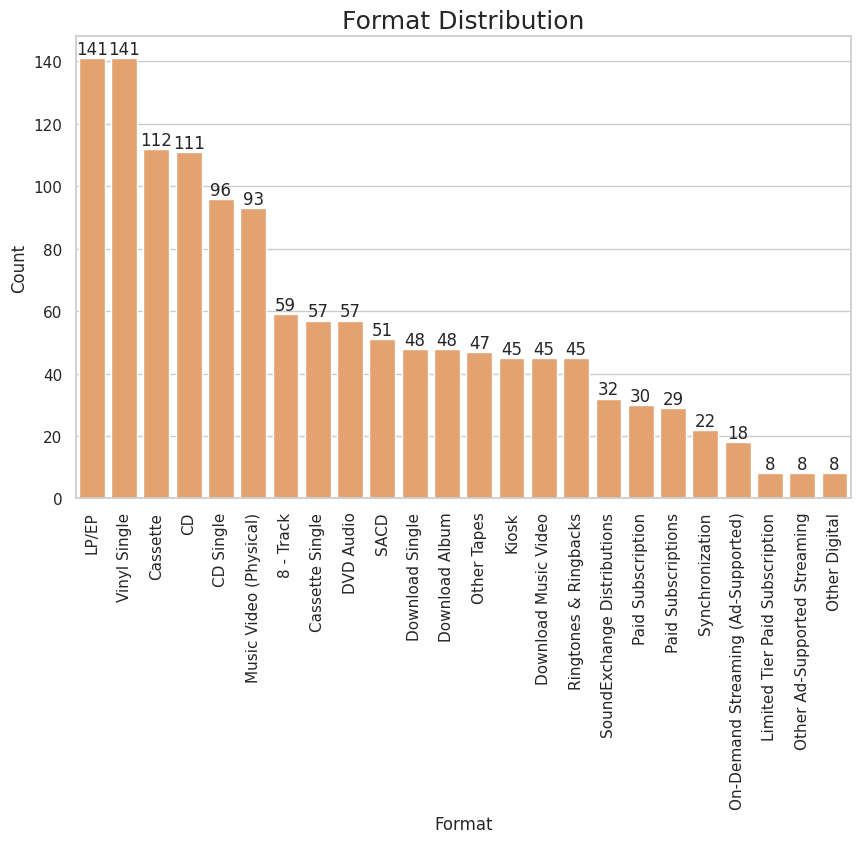

In [70]:
sns.set_theme(style='whitegrid', palette='Oranges_d')

plt.figure(figsize=(10, 6))
ax = sns.barplot(data = format_data)
ax.bar_label(ax.containers[0])
plt.xticks(rotation =90)
plt.xlabel('Format')
plt.ylabel('Count')
plt.title('Format Distribution', fontdict={'fontsize': 18})
plt.show()

In [71]:
metric_counts = df_nan['Metric'].value_counts()
metric_data = metric_counts.to_pandas()
metric_data

Metric
Units               478
Value               437
Value (Adjusted)    436
Name: count, dtype: int64

In [93]:
#isolate metric by unit
df_units = df_nan[df_nan["Metric"] == "Units"]

In [94]:
#isolate metric by value
df_values = df_nan[df_nan["Metric"].isin(['Value', 'Value(Adjusted)'])]

In [95]:
#count values by units
df_units['Actual Values'].groupby(df_units['Format']).sum().round(2)

Format
8 - Track                   900.30
CD                        14802.62
CD Single                   357.72
Cassette                   6194.30
Cassette Single             724.20
DVD Audio                     2.85
Download Album             1120.57
Download Music Video        136.53
Download Single           13496.71
Kiosk                        24.76
LP/EP                      3999.61
Music Video (Physical)      400.84
Other Tapes                   6.30
Paid Subscriptions          351.44
Ringtones & Ringbacks      2124.30
SACD                          3.81
Vinyl Single               2647.68
Name: Actual Values, dtype: float64

In [96]:
#count values by value
df_values['Actual Values'].groupby(df_values['Format']).sum().round(2)

Format
8 - Track                               5618.70
CD                                    205083.95
CD Single                               1549.56
Cassette                               48701.70
Cassette Single                         2325.90
DVD Audio                                 66.47
Download Album                         11327.87
Download Music Video                     271.51
Download Single                        15198.40
Kiosk                                     48.37
LP/EP                                  29415.54
Limited Tier Paid Subscription          2431.52
Music Video (Physical)                  7416.75
On-Demand Streaming (Ad-Supported)      3977.06
Other Ad-Supported Streaming             845.52
Other Digital                             75.38
Other Tapes                               44.20
Paid Subscription                      20782.46
Ringtones & Ringbacks                   5158.41
SACD                                      78.18
SoundExchange Distributions      